In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
d=pd.read_csv("E:\ML Workshop\diamonds.csv")

In [11]:
d


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
d=d.drop(["Unnamed: 0"],axis=1)

In [13]:
d


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
d["cut"]=le.fit_transform(d["cut"])
d["color"]=le.fit_transform(d["color"])
d["clarity"]=le.fit_transform(d["clarity"])


In [15]:
y=d["price"]
x=d.drop(["price"],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_left,y_train,y_left=train_test_split(x,y,train_size=0.7,random_state=56)
x_vali,x_test,y_vali,y_test=train_test_split(x_left,y_left,test_size=0.33,random_state=56)

In [17]:
from sklearn.linear_model import LinearRegression

lg=LinearRegression()

lg.fit(x_train,y_train)

ytestpred=lg.predict(x_test)

In [18]:

test=pd.DataFrame({'Actual:':y_test,'Predicted:':ytestpred})
test

,Actual:,Predicted:
37529,987,634.189680
23925,12052,12402.937162
48878,2036,4625.184121
7234,4194,4373.200090
39274,490,-399.158163
...,...,...
52811,2572,2546.691629
16617,6640,5735.247845
1262,2947,3981.553921
23796,11854,13352.806806


In [19]:
from sklearn.metrics import mean_squared_error as mse
print("MSE on test set:",mse(y_test,ytestpred))
from sklearn.metrics import mean_absolute_error as mae
print("MAE on test set:",mae(y_test,ytestpred))

MSE on test set: 1762989.8616778932
MAE on test set: 854.8412490260101


In [20]:
print("Regressor score on test set is:",lg.score(x_test,y_test))

Regressor score on test set is: 0.8918478832530993


In [21]:
y_valid_pred=lg.predict(x_vali)

In [22]:
df_valid=pd.DataFrame({'Actual:':y_vali,'Predicted:':y_valid_pred})
df_valid

,Actual:,Predicted:
47528,1869,2380.102928
53002,2596,3222.405674
11773,5082,6389.462665
32262,789,732.047810
2210,3142,5194.234826
...,...,...
33308,827,620.178922
34634,872,1119.828818
42966,1365,2280.630750
6795,4115,4423.260941


In [23]:
print("MSE on validation set:",mse(y_vali,y_valid_pred))
print("MAE on validation set:",mae(y_vali,y_valid_pred))

MSE on validation set: 1857076.3407274585
MAE on validation set: 867.1339753208684


In [24]:
print("Regressor score on validation set is:",lg.score(x_vali,y_vali))

Regressor score on validation set is: 0.885470233579283


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)
y_test_pred1=rf.predict(x_test)
y_valid_pred1=rf.predict(x_vali)
print("MSE on test set:",mse(y_test,y_test_pred1))
print("MAE on test set:",mae(y_test,y_test_pred1))
print("Regressor score on test set is:",rf.score(x_test,y_test))
print()
print("MSE on validation set:",mse(y_vali,y_valid_pred1))
print("MAE on validation set:",mae(y_vali,y_valid_pred1))
print("Regressor score on validation set is:",rf.score(x_vali,y_vali))

MSE on test set: 329616.43856319407
MAE on test set: 289.00106815203145
Regressor score on test set is: 0.9797793984412048

MSE on validation set: 325350.52193671477
MAE on validation set: 290.78118485379576
Regressor score on validation set is: 0.9799349555723306


In [26]:
k=[k for k in range(1,15)]
mse_t,mae_t,score_t,mse_v,mae_v,score_v=[],[],[],[],[],[]
for i in k:
    rf1=RandomForestRegressor(n_estimators=i)
    rf1.fit(x_train,y_train)
    y_test_pred=rf1.predict(x_test)
    y_valid_pred=rf1.predict(x_vali)
    
    mse_t.append(mse(y_test,y_test_pred))
    mae_t.append(mae(y_test,y_test_pred))
    score_t.append(rf1.score(x_test,y_test))
    
    mse_v.append(mse(y_vali,y_valid_pred))
    mae_v.append(mae(y_vali,y_valid_pred))
    score_v.append(rf1.score(x_vali,y_vali))

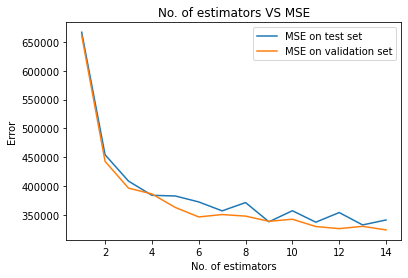

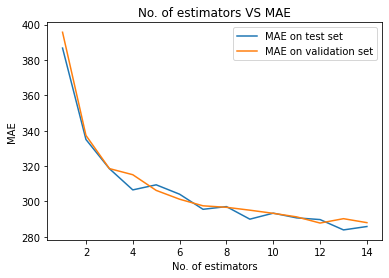

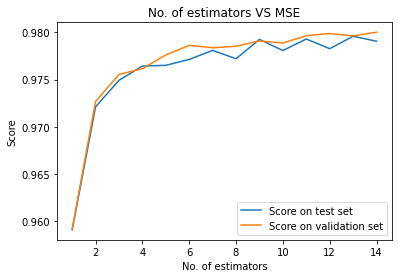

In [27]:
plt.title("No. of estimators VS MSE")
plt.plot(k,mse_t,label="MSE on test set")
plt.plot(k,mse_v,label="MSE on validation set")
plt.legend()
plt.xlabel("No. of estimators")
plt.ylabel("Error")
plt.show()

plt.title("No. of estimators VS MAE")
plt.plot(k,mae_t,label="MAE on test set")
plt.plot(k,mae_v,label="MAE on validation set")
plt.legend()
plt.xlabel("No. of estimators")
plt.ylabel("MAE")
plt.show()

plt.title("No. of estimators VS MSE")
plt.plot(k,score_t,label="Score on test set")
plt.plot(k,score_v,label="Score on validation set")
plt.legend()
plt.xlabel("No. of estimators")
plt.ylabel("Score")
plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
ytestpred1=lr.predict(x_test)
test1=pd.DataFrame({"Actual:":y_test,"Predicted:":ytestpred1})
test1